### 1. Import Packages

In [124]:
import matplotlib.pyplot as plt     # displaying images and plots
import numpy as np                  # numerical computations (especially SVD)
from matplotlib.image import imread # read image from a file
import cv2
import os

### 2. Config Path

In [125]:
imagePath = 'images/house.jpg'
outputPath = 'output_color'

### 3. Read the image

In [126]:
A = cv2.imread(imagePath)
B, G, R = cv2.split(A) # Split each color channel to each matrix

### 4. Save original photo for comparison

In [127]:
cv2.imwrite(f'{outputPath}/original_color.jpg', A)

True

### 5. Print out each color channel 

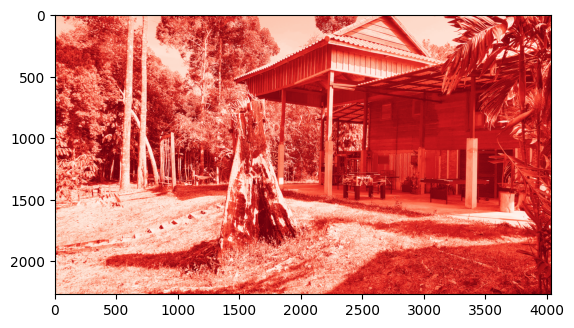

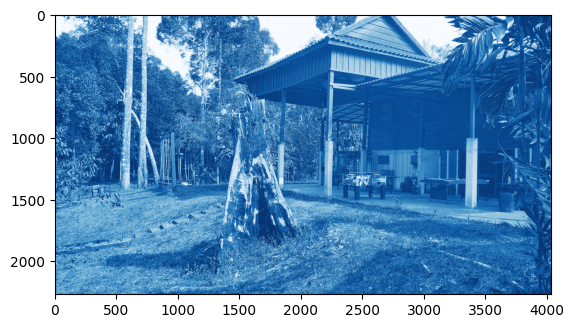

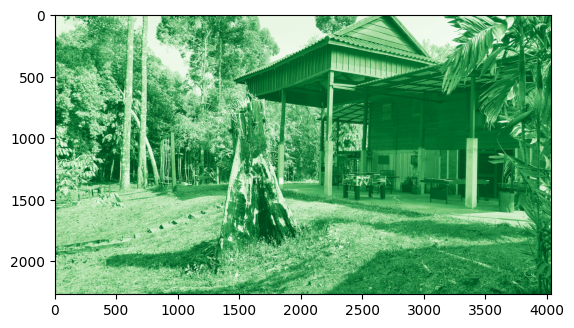

In [128]:
plt.imshow(R, cmap='Reds_r')
plt.show()
plt.imshow(B, cmap='Blues_r')
plt.show()
plt.imshow(G, cmap='Greens_r')
plt.show()

### 6. Apply SVD on each color channel

In [129]:
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)

(2268, 4032, 3)


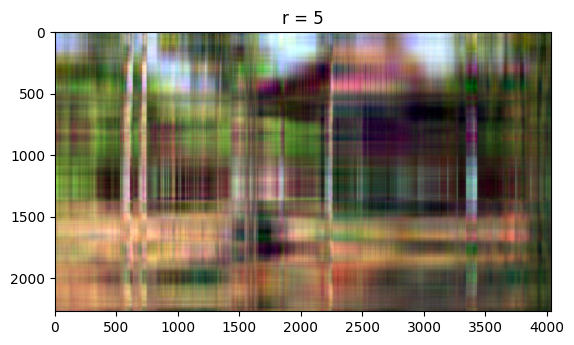

(2268, 4032, 3)


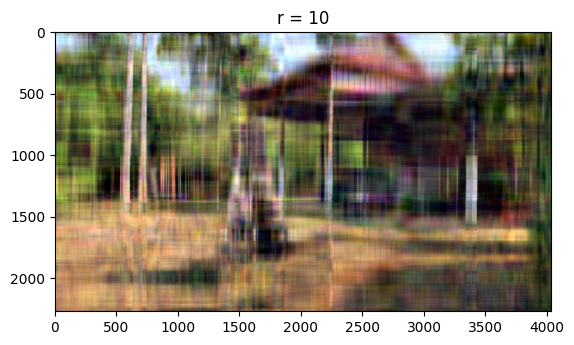

(2268, 4032, 3)


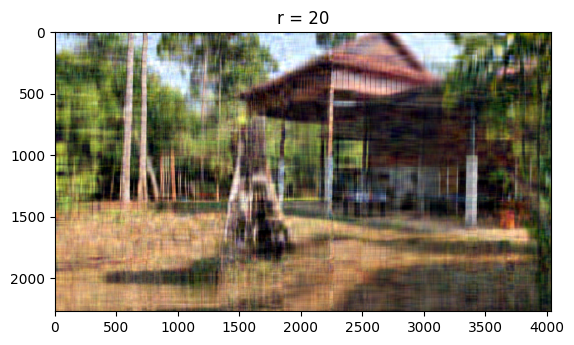

(2268, 4032, 3)


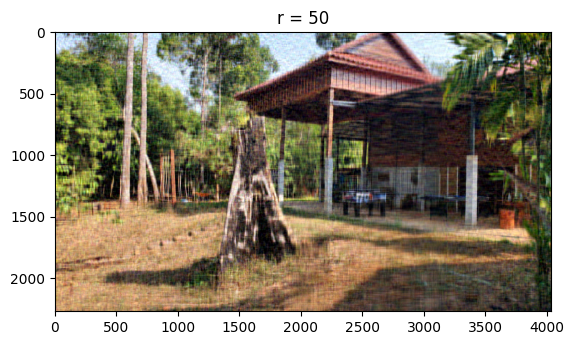

(2268, 4032, 3)


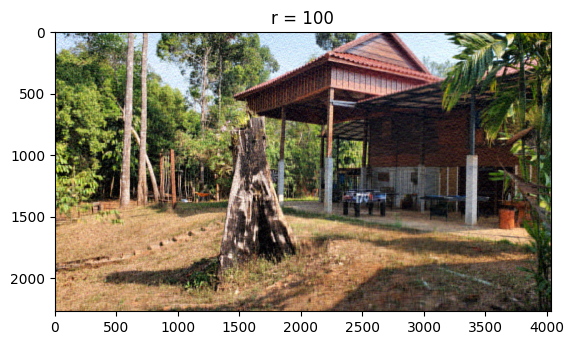

(2268, 4032, 3)


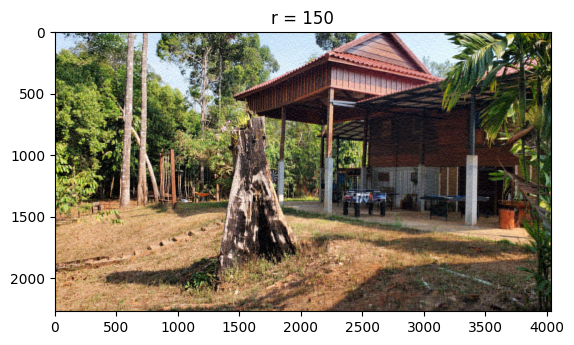

(2268, 4032, 3)


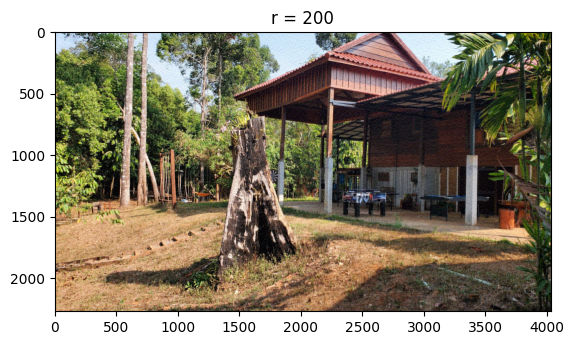

(2268, 4032, 3)


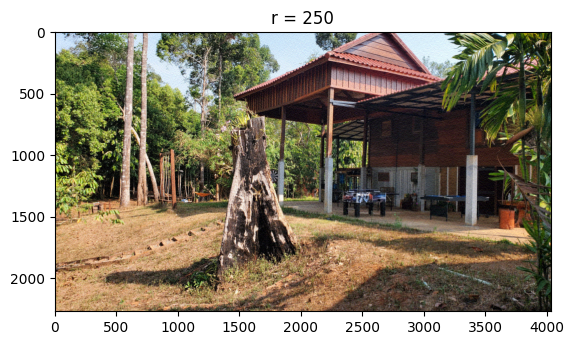

In [130]:
for r in (5, 10, 20, 50, 100, 150, 200, 250):
    R_compressed = U_R[:, :r] @ np.diag(S_R[:r]) @ Vt_R[:r, :]
    G_compressed = U_G[:, :r] @ np.diag(S_G[:r]) @ Vt_G[:r, :]
    B_compressed = U_B[:, :r] @ np.diag(S_B[:r]) @ Vt_B[:r, :]

    # Combining the compressed channels
    compressed_image = cv2.merge([np.clip(B_compressed, 0, 255), np.clip(G_compressed, 0, 255), np.clip(R_compressed, 0, 255)])

    compressed_image = compressed_image.astype(np.uint8)
    print(compressed_image.shape)
    plt.imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
    plt.title('r = %s' % r)
    plt.show()

    success = cv2.imwrite(f'{outputPath}/{r}_color_compressed.jpg', compressed_image)


### 7. Print out graph

<function matplotlib.pyplot.show(close=None, block=None)>

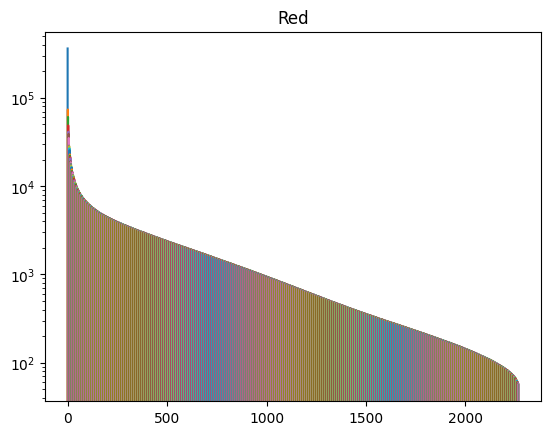

In [131]:
plt.semilogy(np.diag(S_R))
plt.title("Red")
plt.show

In [132]:
images_dir_path = 'output_color'
files_with_sizes = []

for file_name in os.listdir(images_dir_path):
    file_path = os.path.join(images_dir_path, file_name)
    
    file_size = os.stat(file_path).st_size  # Get file size in bytes
    files_with_sizes.append((file_name, file_size))

files_with_sizes.sort(key=lambda x: x[1], reverse=True)

for file_name, file_size in files_with_sizes:
    print(f'{file_name} : {round(file_size / 1000)} KB')

original_color.jpg : 5069 KB
250_color_compressed.jpg : 4708 KB
200_color_compressed.jpg : 4503 KB
150_color_compressed.jpg : 4208 KB
100_color_compressed.jpg : 3772 KB
50_color_compressed.jpg : 3110 KB
20_color_compressed.jpg : 2451 KB
10_color_compressed.jpg : 2094 KB
5_color_compressed.jpg : 1809 KB
